# Домашнее задание №1: Введение в HPC

**Задание:** Используя данные с сайта top500.org (statistics/performance development) попробуйте предсказать вычислительную мощность компьютера #1 и компьютера #500.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Из заранее созданного CSV-файла считываем о топ-1 и топ-500 компьютерах за все время.

Скачать файл можно [тут]().

Возпроизвести код по созданию этого файла можно из файла "Parse top500 hpc.ipynb" в [этом репозитории](url_here).

In [3]:
df = pd.read_csv('data_top500_hpc.csv', index_col=0)
df.head()

,data,#1 GFlop/s,#500 GFlop/s,Sum GFlop/s
0,06/1993,59.7,0.422,1122.845
1,11/1993,124.0,0.472,1466.210
2,06/1994,143.4,0.822,2233.882
3,11/1994,170.0,1.114,2622.338
4,06/1995,170.0,1.955,3927.029


In [4]:
x_dates = df['data']

y_1 = df['#1 GFlop/s']
y_500 = df['#500 GFlop/s']
y_sum = df['Sum GFlop/s']

x = [i for i in range(len(y_1))]

Построим график показывающий рост мошностей в зависимости от года. 

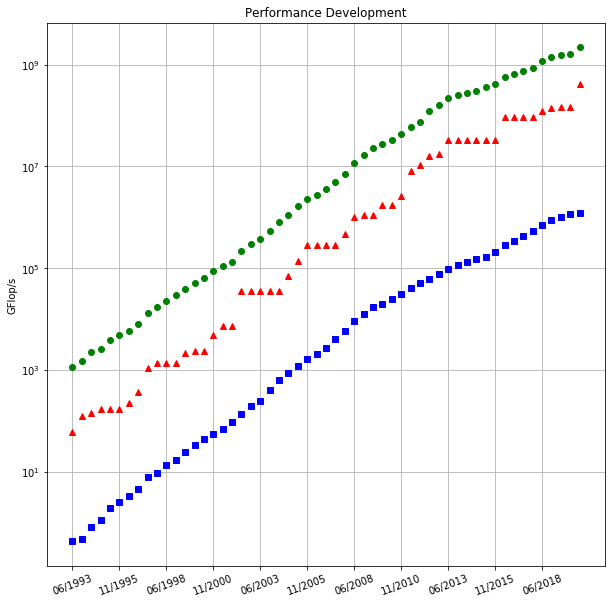

In [31]:
plt.figure(figsize=(10, 10))

plt.plot(x_dates, y_sum, 'go')
plt.plot(x_dates, y_1, 'r^')
plt.plot(x_dates, y_500, 'bs')

plt.title('Performance Development')
plt.ylabel('GFlop/s')
plt.yscale('log')
plt.xticks(x_dates[::5], rotation=20)
plt.grid(True)
plt.show()

Построим прямую приближенно показывающую рост вычислительных мощностей

In [ ]:
# https://stackoverflow.com/questions/43837179/best-fit-line-on-log-log-scales-in-python-2-7/43838500

In [10]:
m_1, c_1 = np.polyfit(x, np.log(y_1), 1)
y_fit_1 = np.exp(m_1*np.array(x) + c_1)

m_500, c_500 = np.polyfit(x, np.log(y_500), 1)
y_fit_500 = np.exp(m_500*np.array(x) + c_500)

m_sum, c_sum = np.polyfit(x, np.log(y_sum), 1)
y_fit_sum = np.exp(m_sum*np.array(x) + c_sum)

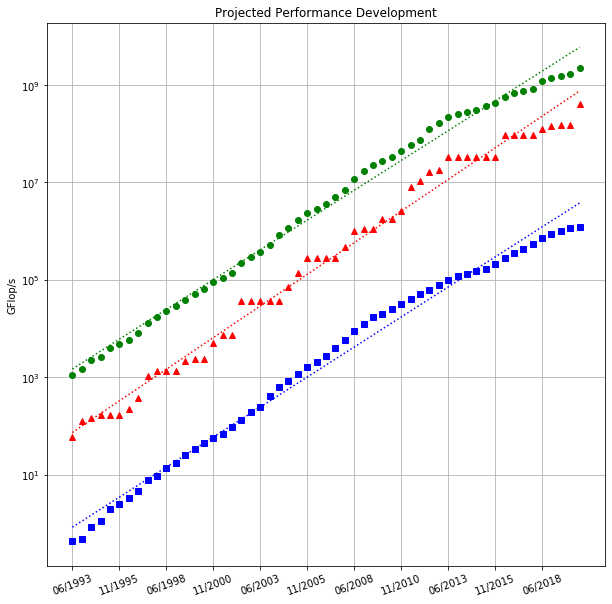

In [30]:
plt.figure(figsize=(10, 10))

plt.plot(x_dates, y_sum, 'go')
plt.plot(x_dates, y_1, 'r^')
plt.plot(x_dates, y_500, 'bs')

plt.plot(x_dates, y_fit_sum, 'g:')
plt.plot(x_dates, y_fit_1, 'r:')
plt.plot(x_dates, y_fit_500, 'b:')

plt.title('Projected Performance Development')
plt.ylabel('GFlop/s')
plt.yscale('log')
plt.xticks(x_dates[::5], rotation=20)
plt.grid(True)
plt.show()

Попробуем предугадать рост вычислительных мощностей до 2025 года.

В прогнозе мы используем не само значение даты, а порядковый номер периода, значит нам нужно сделать прогноз на 55 - 65 периоды

In [32]:
# актуальные данные
[(i, x) for i, x in enumerate(x_dates)][-5:]

[(50, '06/2018'),
 (51, '11/2018'),
 (52, '06/2019'),
 (53, '11/2019'),
 (54, '06/2020')]

In [33]:
# период на который нужно сделать прогноз

# 11/2020 - 55
# 06/2021 - 56
# 11/2021 - 57
# 06/2022 - 58
# 11/2022 - 59
# 06/2023 - 60
# 11/2023 - 61
# 06/2024 - 62
# 11/2024 - 63
# 06/2025 - 64
# 11/2025 - 65

In [34]:
pred_x = [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]

In [35]:
y_pred_1 = np.exp(m_1*np.array(pred_x) + c_1)/1000000
y_pred_500 = np.exp(m_500*np.array(pred_x) + c_500)/1000000
y_pred_sum = np.exp(m_sum*np.array(pred_x) + c_sum)/1000000

In [36]:
predict_data = {
    'data': ['11/2020', '06/2021', '11/2021', '06/2022', '11/2022', '06/2023', '11/2023', '06/2024', '11/2024', '06/2025', '11/2025'],
    '#1 PFlop/s': y_pred_1,
    '#500 PFlop/s': y_pred_500,
    'Sum PFlop/s': y_pred_sum,
}

In [37]:
df = pd.DataFrame(predict_data)
df

,data,#1 PFlop/s,#500 PFlop/s,Sum PFlop/s
0,11/2020,1020.097868,5.031130,7889.299579
1,06/2021,1375.808429,6.683232,10456.597343
2,11/2021,1855.556110,8.877845,13859.332745
3,06/2022,2502.592952,11.793115,18369.369867
4,11/2022,3375.253084,15.665691,24347.041485
5,06/2023,4552.211887,20.809926,32269.938129
6,11/2023,6139.579031,27.643405,42771.065532
7,06/2024,8280.464886,36.720833,56689.419093
8,11/2024,11167.882745,48.779071,75137.016046
9,06/2025,15062.150100,64.796943,99587.740897
